# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

'''
You've learnt about all the core aspects of data exploration, data cleaning, and data visualisation. 
Download, unzip and open the notebook I've included for this assignment.

You'll find an incredibly rich dataset from nextspaceflight.com that includes all the space missions 
since the beginning of Space Race between the USA and the Soviet Union in 1957! It has data on the 
mission status (success/failure), the cost of the mission, the number of launches per country, and 
much much more. There's so much we can learn from this dataset about the dominant organisations and 
the trends over time. For example:

    Who launched the most missions in any given year?
    How has the cost of a space mission varied over time?
    Which months are the most popular for launches?
    Have space missions gotten safer or has the chance of failure remained unchanged?

I'm sure that you'll discover many more questions that you can formulate and answer with this dataset! 
Use it to practice what you learnt about creating various types of charts and visualisations, from 
choropleths to sunburst charts to segmented bar charts and see if you can turn data into insight. Good luck!
'''

### Install Package with Country Codes

In [2]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
# %pip install --upgrade plotly

### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df_data.tail(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [9]:
print(f"The shape of the mission_launches dataset is: {df_data.shape}.")

The shape of the mission_launches dataset is: (4324, 9).


In [10]:
print(f"The mission_launches dataset has {len(df_data.columns)} columns.")

The mission_launches dataset has 9 columns.


In [11]:
print(f"The mission_launches dataset has {df_data.shape[0]} rows.")

The mission_launches dataset has 4324 rows.


In [12]:
print(f"The mission_launches dataset has these columns: {df_data.columns}")

The mission_launches dataset has these columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check and consider NAN Values

In [13]:
df_data.isnull().mean()

Unnamed: 0.1     0.00
Unnamed: 0       0.00
Organisation     0.00
Location         0.00
Date             0.00
Detail           0.00
Rocket_Status    0.00
Price            0.78
Mission_Status   0.00
dtype: float64

In [14]:
df_data.isnull().value_counts()

Unnamed: 0.1  Unnamed: 0  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False       False         False     False  False   False          True   False             3360
                                                                                False  False              964
Name: count, dtype: int64

In [15]:
df_data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

The only feature with NAN values is Price that has a 78% of the values missing which means that just 964 rows have values and 3360 doesn't.

## Data Cleaning - Check and consider for Duplicates

### Handle duplicated values

In [16]:
df_data.duplicated().sum()

0

We can see that this dataset has no duplicate values.

## Data Cleaning - Getting rid of the existing indexes

In [17]:
df_data = df_data.drop("Unnamed: 0", axis = 1)

In [18]:
df_data = df_data.drop("Unnamed: 0.1", axis = 1)

In [19]:
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Transform the Date column to datetime format

In [20]:
df_data["Week_Day"] = df_data.Date.str[:3]

In [21]:
df_data["Date"] = df_data.Date.str[3:]

In [22]:
df_data.Date

0        Aug 07, 2020 05:12 UTC
1        Aug 06, 2020 04:01 UTC
2        Aug 04, 2020 23:57 UTC
3        Jul 30, 2020 21:25 UTC
4        Jul 30, 2020 11:50 UTC
                 ...           
4319     Feb 05, 1958 07:33 UTC
4320     Feb 01, 1958 03:48 UTC
4321     Dec 06, 1957 16:44 UTC
4322     Nov 03, 1957 02:30 UTC
4323     Oct 04, 1957 19:28 UTC
Name: Date, Length: 4324, dtype: object

In [23]:
df_data.Date = df_data.Date.str[:-3]

In [24]:
df_data.Date 

0        Aug 07, 2020 05:12 
1        Aug 06, 2020 04:01 
2        Aug 04, 2020 23:57 
3        Jul 30, 2020 21:25 
4        Jul 30, 2020 11:50 
                ...         
4319     Feb 05, 1958 07:33 
4320     Feb 01, 1958 03:48 
4321     Dec 06, 1957 16:44 
4322     Nov 03, 1957 02:30 
4323     Oct 04, 1957 19:28 
Name: Date, Length: 4324, dtype: object

In [25]:
df_data.Date = pd.to_datetime(df_data.Date, format='mixed')

In [26]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu


### Create a new dataset without Price

In [27]:
df_data_without_price = df_data.drop("Price", axis = 1)

In [28]:
df_data_without_price.head()

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,Week_Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,Success,Thu


## Descriptive Statistics

In [29]:
df_data.describe()

,Date
count,4324
mean,1988-05-18 14:47:13.709528192
min,1957-10-04 19:28:00
25%,1972-09-01 03:23:30
50%,1985-12-16 00:18:30
75%,2002-06-06 22:01:30
max,2020-08-07 05:12:00


In [30]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   datetime64[ns]
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Price           964 non-null    object        
 6   Mission_Status  4324 non-null   object        
 7   Week_Day        4324 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 270.4+ KB


In [31]:
df_data_without_price.describe()

,Date
count,4324
mean,1988-05-18 14:47:13.709528192
min,1957-10-04 19:28:00
25%,1972-09-01 03:23:30
50%,1985-12-16 00:18:30
75%,2002-06-06 22:01:30
max,2020-08-07 05:12:00


In [32]:
df_data_without_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   datetime64[ns]
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Mission_Status  4324 non-null   object        
 6   Week_Day        4324 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [33]:
df_data.Organisation.value_counts()

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

/var/folders/0m/dkmz8ryx1zz2skjs620w5scw0000gn/T/ipykernel_15816/3232910843.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right" , rotation_mode="anchor")


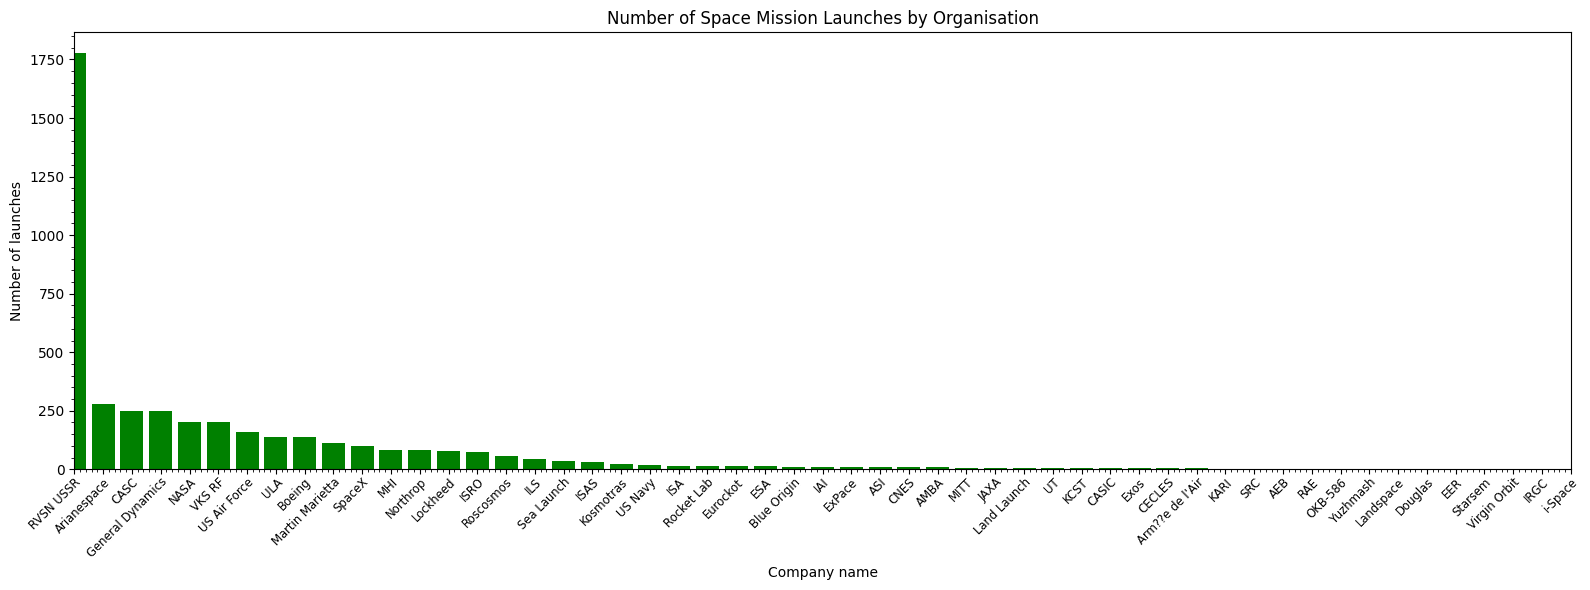

In [34]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_size_inches(16, 6)
ax.bar(df_data['Organisation'].value_counts().index,
       df_data['Organisation'].value_counts().values, fc = "green")
ax.set_title('Number of Space Mission Launches by Organisation')
ax.set_xlabel("Company name")
ax.set_ylabel("Number of launches")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right" , rotation_mode="anchor")
ax.tick_params("x", which='major', labelrotation = 45, pad = 1, labelsize = "small")
ax.minorticks_on()
ax.set_xlim(0, df_data['Organisation'].max())
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [35]:
df_data['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

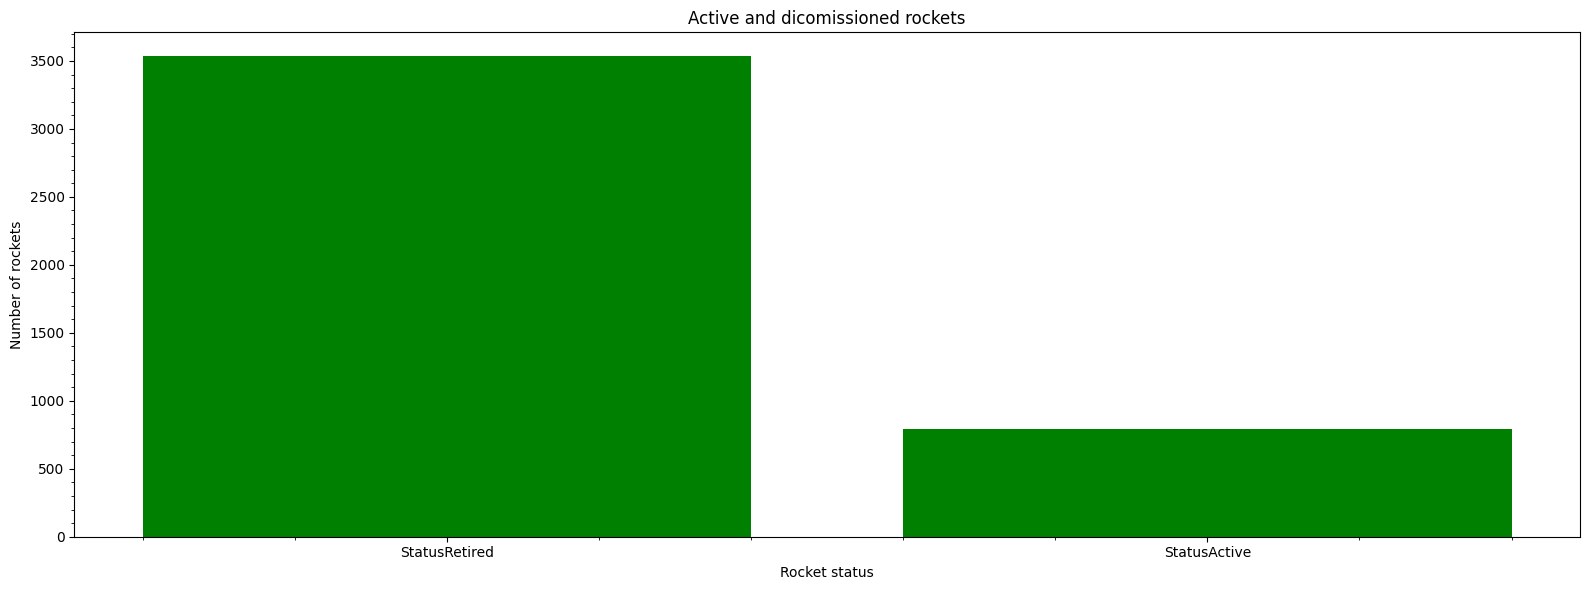

In [36]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_size_inches(16, 6)
ax.bar(df_data['Rocket_Status'].value_counts().index,
       df_data['Rocket_Status'].value_counts().values, fc = "green")
ax.set_title('Active and dicomissioned rockets')
ax.set_xlabel("Rocket status")
ax.set_ylabel("Number of rockets"),
ax.minorticks_on()
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

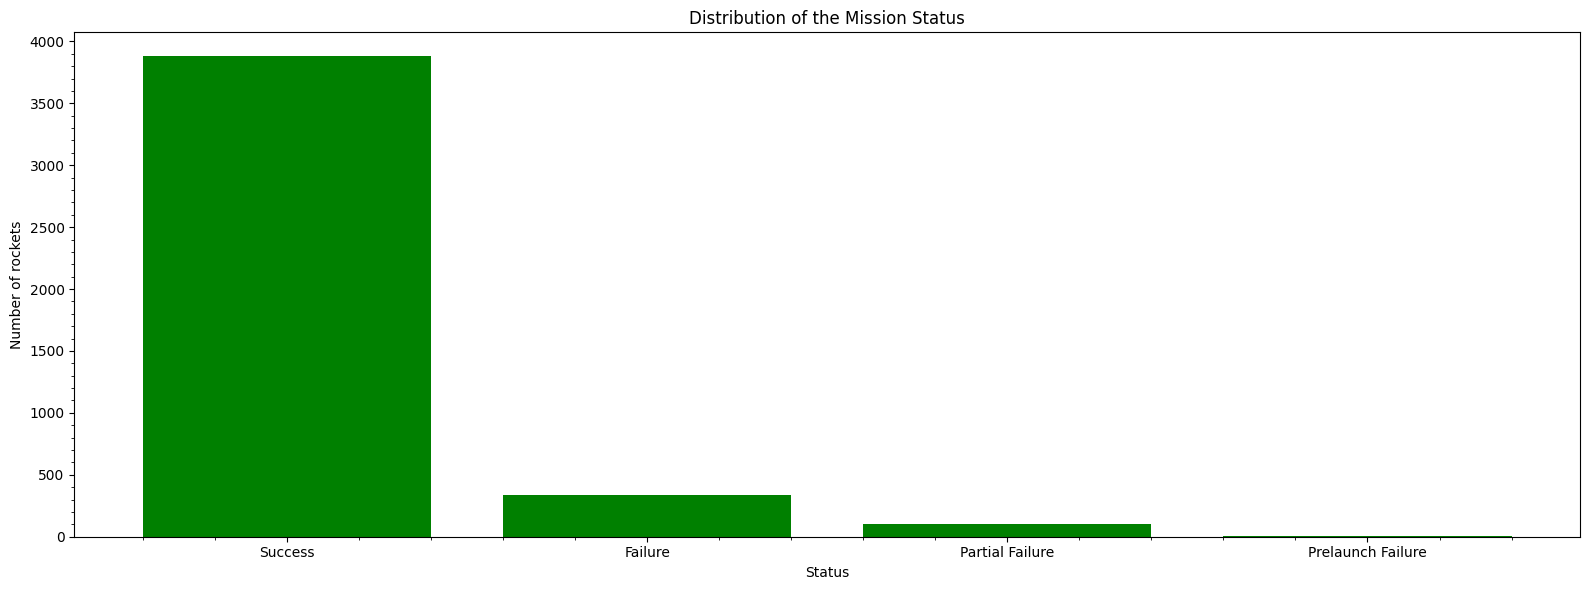

In [37]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_size_inches(16, 6)
ax.bar(df_data['Mission_Status'].value_counts().index,
       df_data['Mission_Status'].value_counts().values, fc = "green")
ax.set_title('Distribution of the Mission Status')
ax.set_xlabel("Status")
ax.set_ylabel("Number of rockets"),
ax.minorticks_on()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [38]:
price_col = df_data.loc[df_data["Price"].notnull(), "Price"]

In [39]:
price_col.isnull().any()

False

In [40]:
price_col = price_col.replace(',', '', regex=True).astype("float")

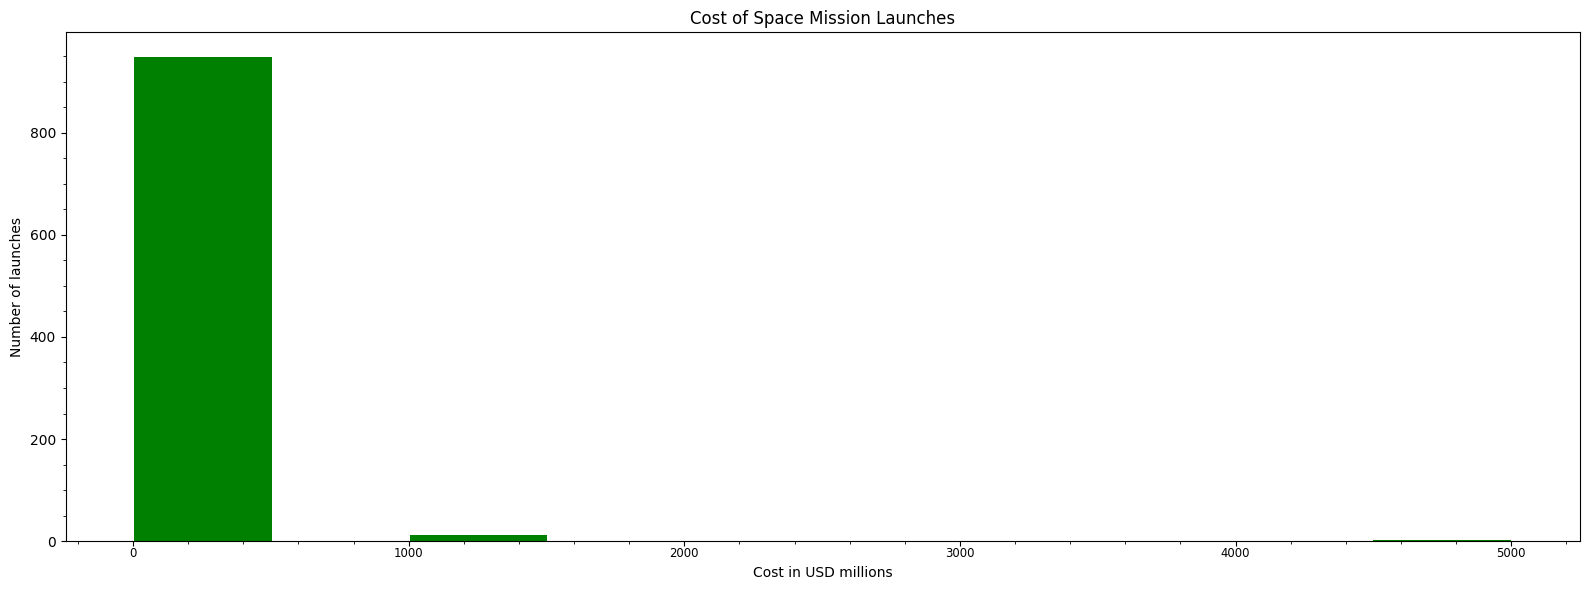

In [41]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_size_inches(16, 6)
ax.hist(price_col, fc = "green")
ax.set_title('Cost of Space Mission Launches')
ax.set_xlabel("Cost in USD millions")
ax.set_ylabel("Number of launches")
ax.tick_params("x", which='major', pad = 1, labelsize = "small")
ax.minorticks_on()
plt.show()

Most of the launches (almost 900) have had a cost between $0 and $500 USD millions.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [42]:
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day
522,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2015-01-10 09:47:00,Falcon 9 v1.1 | CRS-5,StatusRetired,56.5,Success,Sat
3709,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1967-12-05 18:45:00,Titan IIIB | OPS 5000,StatusRetired,59.0,Success,Tue
3880,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA",1966-05-14 18:30:00,Atlas-SLV3 Agena-D | KH-7 Gambit 4028,StatusRetired,NaN,Success,Sat
1709,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",1992-03-04 04:27:00,Molniya-M /Block ML | Molniya-1 n†­152,StatusRetired,NaN,Success,Wed
783,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2009-02-12 22:09:00,"Ariane 5 ECA | Hot Bird 10, NSS-9, Spirale-A & B",StatusActive,200.0,Success,Thu


In [83]:
countries_to_be_changed = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea" : "China",
    "Shahrud Missile Test Site": 'Iran, Islamic Republic of',
    "Iran": 'Iran, Islamic Republic of',
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "North Korea": "Korea, Democratic People's Republic of",
    "South Korea": "Korea, Republic of",
    "Pacific Ocean": "USA",
}

# Getting the countries
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

# Normalize the country names
df_data["Country"] = df_data["Country"].replace(countries_to_be_changed)
df_data["Country"].head(5)

# Get the country codes
# def function(country):
#     return countries.get(country)[2]
# df_data["Country_Code"] = df_data["Country"].map(function)

df_data["Country_Code"] = df_data["Country"].map(lambda x: countries.get(x)[2])


In [84]:
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day,Country,Country_Code,Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,USA,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,China,CHN,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,USA,USA,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Kazakhstan,KAZ,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,USA,USA,1


In [85]:
df_counts = (df_data[["Country", "Country_Code"]].value_counts()).reset_index()

In [86]:
df_counts

,Country,Country_Code,count
0,Russian Federation,RUS,1398
1,USA,USA,1387
2,Kazakhstan,KAZ,701
3,France,FRA,303
4,China,CHN,269
5,Japan,JPN,126
6,India,IND,76
7,"Iran, Islamic Republic of",IRN,14
8,New Zealand,NZL,13
9,Israel,ISR,11


In [87]:
import plotly.express as px

fig = px.choropleth(df_counts, locations="Country_Code",
                    color="count", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Mint,
                    )
fig.update_layout(
    title_text = 'Number of launches by country',
    width = 800, 
    height = 600,
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [88]:
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day,Country,Country_Code,Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,USA,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,China,CHN,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,USA,USA,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Kazakhstan,KAZ,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,USA,USA,1


In [89]:
df_data["Count"] = 1
df_ms = df_data.groupby(["Country", "Country_Code", "Mission_Status"]).Count.sum().reset_index()
df_plot = df_ms.loc[df_ms["Mission_Status"]== "Failure",:]
df_plot.head(5)

,Country,Country_Code,Mission_Status,Count
0,Australia,AUS,Failure,3
2,Brazil,BRA,Failure,2
4,China,CHN,Failure,19
7,France,FRA,Failure,13
10,India,IND,Failure,8


In [90]:
import plotly.express as px

fig = px.choropleth(df_plot, locations="Country_Code",
                    color="Count", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Mint,
                    )
fig.update_layout(
    title_text = 'Failure of launches by country',
    width = 800, 
    height = 600,
)

fig.show()

In [91]:
df_ms.head(5)

,Country,Country_Code,Mission_Status,Count
0,Australia,AUS,Failure,3
1,Australia,AUS,Success,3
2,Brazil,BRA,Failure,2
3,Brazil,BRA,Prelaunch Failure,1
4,China,CHN,Failure,19


In [92]:
df_pivot = df_ms.pivot_table(values = "Count", columns = "Mission_Status", index = ["Country", "Country_Code"]).fillna(0)

In [93]:
df_pivot["Total"] = df_pivot[["Failure", "Success", "Partial Failure", "Prelaunch Failure"]].sum(axis = 1)
df_pivot

,Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total
Country,Country_Code,,,,,
Australia,AUS,3.00,0.00,0.00,3.00,6.00
Brazil,BRA,2.00,0.00,1.00,0.00,3.00
China,CHN,19.00,6.00,0.00,244.00,269.00
France,FRA,13.00,5.00,0.00,285.00,303.00
India,IND,8.00,5.00,0.00,63.00,76.00
"Iran, Islamic Republic of",IRN,8.00,0.00,1.00,5.00,14.00
Israel,ISR,2.00,0.00,0.00,9.00,11.00
Japan,JPN,10.00,3.00,0.00,113.00,126.00
Kazakhstan,KAZ,72.00,20.00,1.00,608.00,701.00


In [94]:
df_pivot["Success_Rate"] = df_pivot["Success"] / df_pivot["Total"]

In [95]:
df_pivot

,Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Success_Rate
Country,Country_Code,,,,,,
Australia,AUS,3.00,0.00,0.00,3.00,6.00,0.50
Brazil,BRA,2.00,0.00,1.00,0.00,3.00,0.00
China,CHN,19.00,6.00,0.00,244.00,269.00,0.91
France,FRA,13.00,5.00,0.00,285.00,303.00,0.94
India,IND,8.00,5.00,0.00,63.00,76.00,0.83
"Iran, Islamic Republic of",IRN,8.00,0.00,1.00,5.00,14.00,0.36
Israel,ISR,2.00,0.00,0.00,9.00,11.00,0.82
Japan,JPN,10.00,3.00,0.00,113.00,126.00,0.90
Kazakhstan,KAZ,72.00,20.00,1.00,608.00,701.00,0.87


In [96]:
import plotly.express as px

fig = px.choropleth(df_pivot.reset_index(), locations="Country_Code",
                    color="Success_Rate", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Mint,
                    )
fig.update_layout(
    title_text = 'Success rate of launches by country',
    width = 800, 
    height = 600,
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [97]:
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day,Country,Country_Code,Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,USA,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,China,CHN,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,USA,USA,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Kazakhstan,KAZ,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,USA,USA,1


In [98]:
df_data_sunburst = df_data.groupby(["Country", "Organisation", "Mission_Status"]).Count.sum().reset_index()
df_data_sunburst.head(5)

,Country,Organisation,Mission_Status,Count
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [99]:
fig = px.sunburst(df_data_sunburst, path = ["Mission_Status", "Country", "Organisation"], values = "Count")
fig.update_layout(
    title_text = 'Mission status, countries and organizations',
    width = 800, 
    height = 600,
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [100]:
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day,Country,Country_Code,Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,USA,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,China,CHN,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,USA,USA,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Kazakhstan,KAZ,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,USA,USA,1


In [101]:
# Creation of the needed table for ploting.
df_price = df_data.groupby(["Country", "Organisation", "Mission_Status", "Price"]).Count.sum().reset_index()
df_price.head(5)

,Country,Organisation,Mission_Status,Price,Count
0,China,CASC,Failure,29.15,1
1,China,CASC,Failure,64.68,2
2,China,CASC,Partial Failure,29.15,1
3,China,CASC,Partial Failure,29.75,1
4,China,CASC,Partial Failure,69.7,1


In [102]:
fig = px.sunburst(df_price, path = ["Country", "Organisation", "Price"], 
                  values = "Count",
                  )
fig.update_layout(
    title_text = 'Cost of the missions by country and organisation in USD millions',
    width = 800, 
    height = 600,
)
fig.show()

In [103]:
fig = px.sunburst(df_price, path = ["Country", "Organisation", "Price", "Mission_Status"], 
                  values = "Count", 
                  color = "Mission_Status",
                  )
fig.update_layout(
    title_text = 'Total price spent by organisation in USD millions splited by mission status', 
    width = 800, 
    height = 600,
    margin = dict(t=40, l =0, r = 0, b=40)
)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [110]:
df_data["Price"] = df_data["Price"].str.replace(",", "").astype("float")

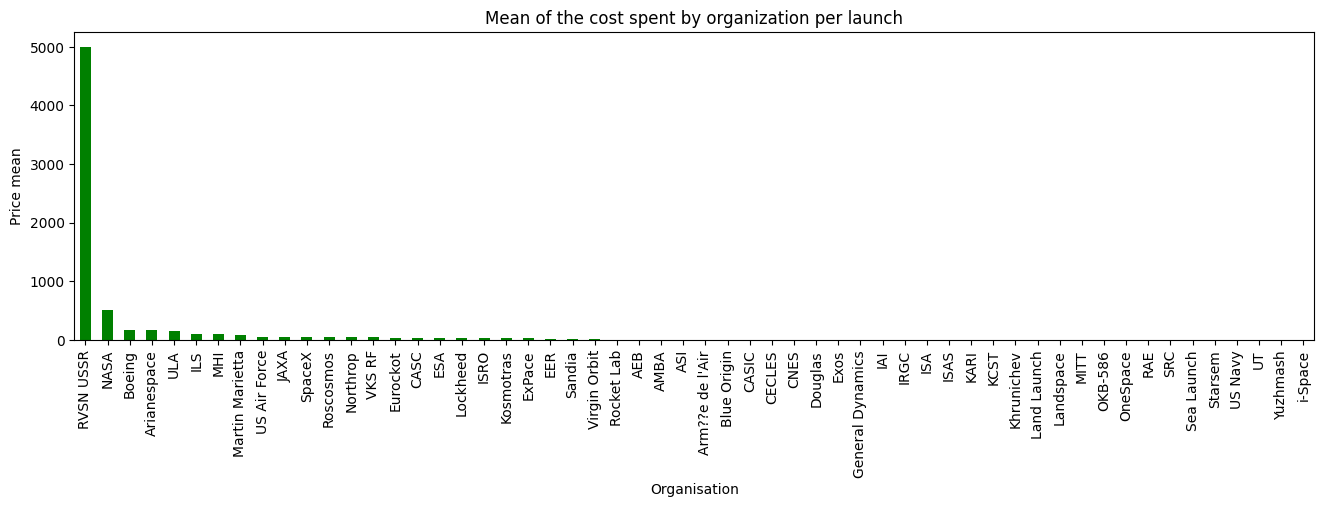

In [139]:
price_org = df_data.groupby(["Organisation"]).Price.mean().sort_values(ascending = False).plot.bar(
            figsize = (16, 4),
            title = 'Mean of the cost spent by organization per launch',
            ylabel = "Price mean",
            color = "green",
            )
plt.show()

# Chart the Number of Launches per Year

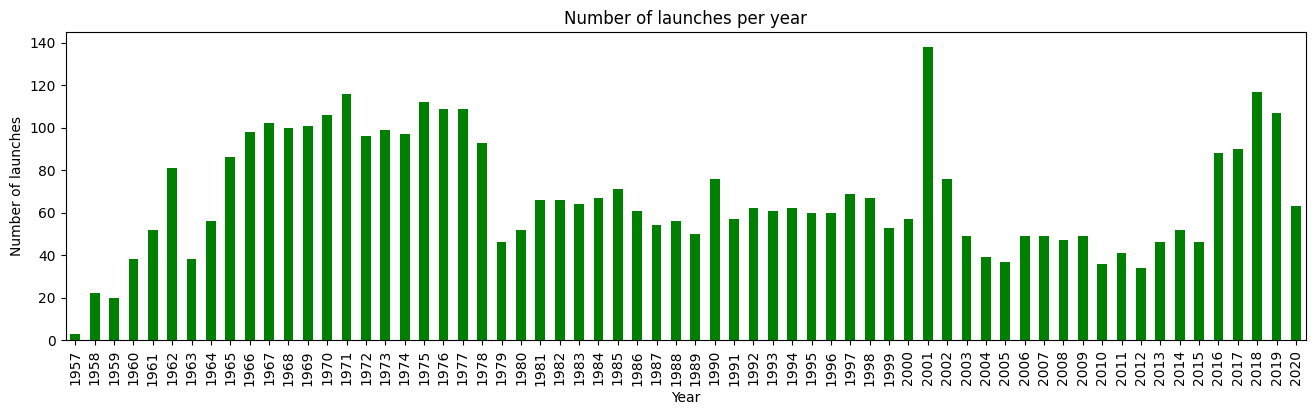

In [157]:
year = df_data["Date"].dt.year
price_org = df_data.groupby(year).Count.sum().plot.bar(
            figsize = (16, 4),
            title = 'Number of launches per year',
            ylabel = "Number of launches",
            xlabel = "Year",
            color = "green",
            )
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [167]:
year_month = df_data["Date"].dt.year.astype("string") + " " + df_data["Date"].dt.month.astype("string").str.zfill(2)
year_month

0       2020 08
1       2020 08
2       2020 08
3       2020 07
4       2020 07
         ...   
4319    1958 02
4320    1958 02
4321    1957 12
4322    1957 11
4323    1957 10
Name: Date, Length: 4324, dtype: string

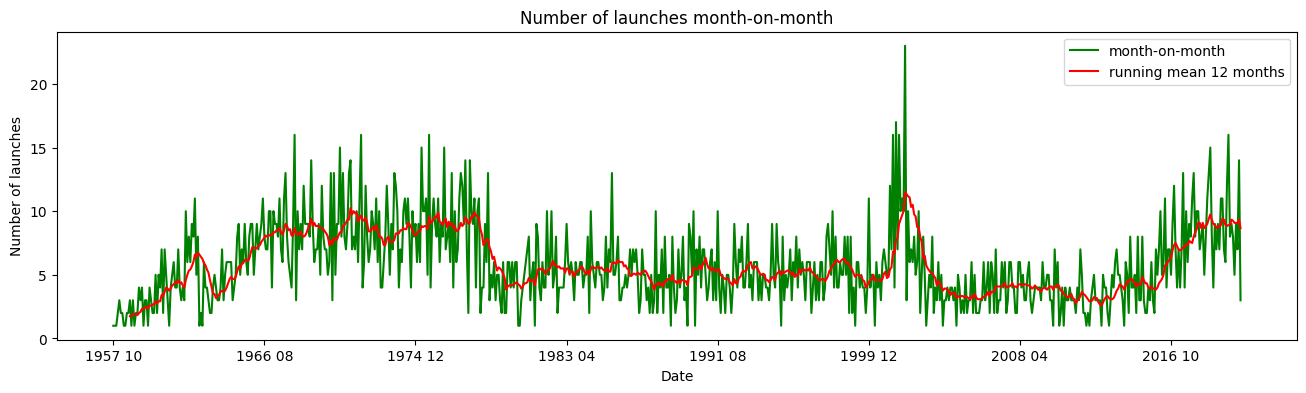

In [182]:
price_org = df_data.groupby(year_month).Count.sum().plot.line(
            figsize = (16, 4),
            title = 'Number of launches month-on-month',
            ylabel = "Number of launches",
            color = "green",
            label = "month-on-month"
            )
price_org = df_data.groupby(year_month).Count.sum().rolling(window=12).mean().plot.line(
            figsize = (16, 4),
            color = "red",
            label = "running mean 12 months"
            )
plt.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

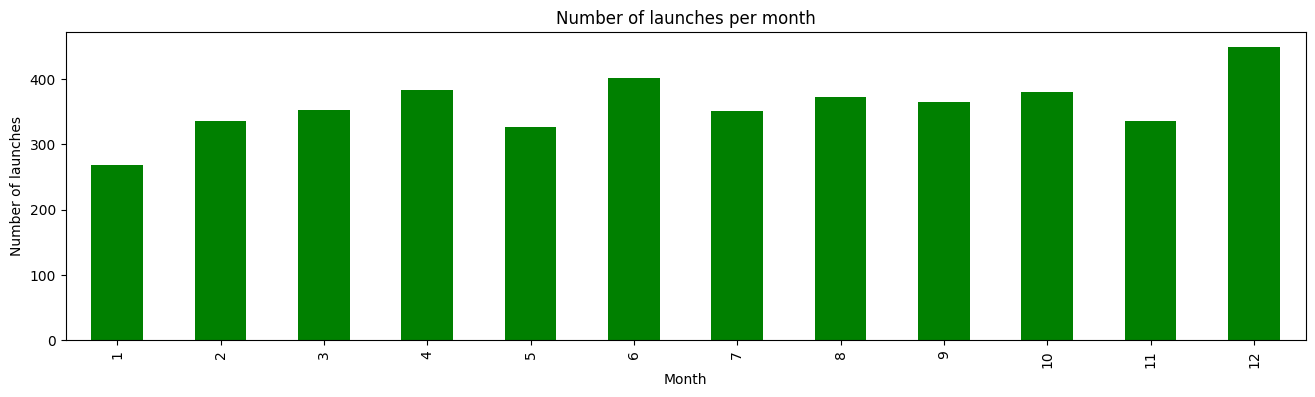

In [186]:
month =  df_data["Date"].dt.month
price_org = df_data.groupby(month).Count.sum().plot.bar(
            figsize = (16, 4),
            title = 'Number of launches per month',
            ylabel = "Number of launches",
            xlabel = "Month",
            color = "green",
            )
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [197]:
df_data["Year"] = df_data["Date"].dt.year
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Week_Day,Country,Country_Code,Count,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,USA,USA,1,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,China,CHN,1,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,USA,USA,1,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Kazakhstan,KAZ,1,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,USA,USA,1,2020


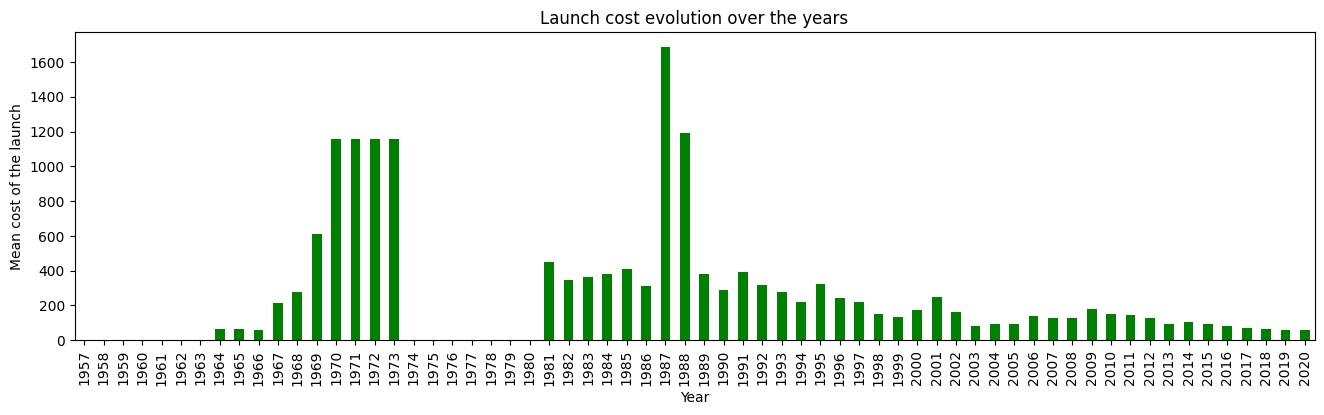

In [202]:
df_data.groupby(["Year"]).Price.mean().plot.bar(
            figsize = (16, 4),
            title = 'Launch cost evolution over the years',
            ylabel = "Mean cost of the launch",
            xlabel = "Year",
            color = "green",
            )
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

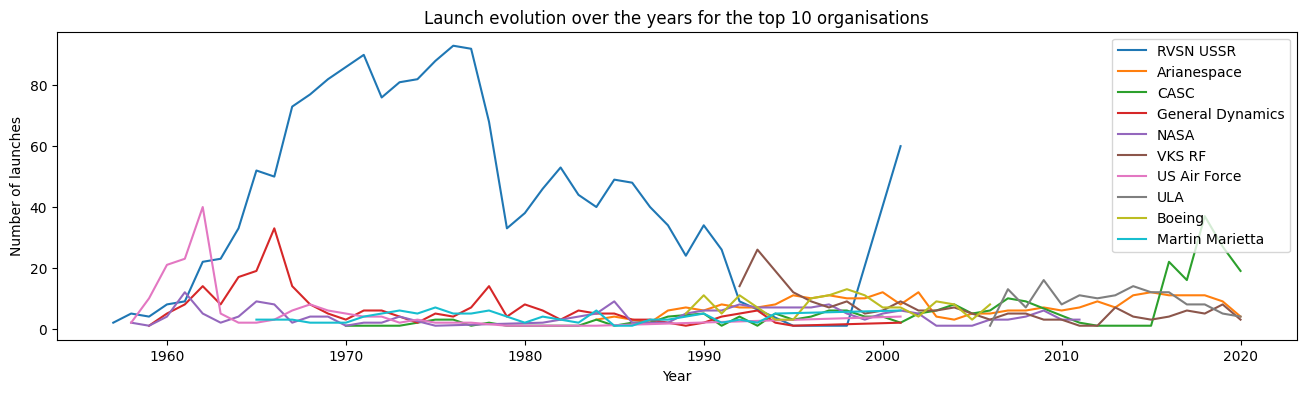

In [218]:
top_10_org = df_data["Organisation"].value_counts()[:10].index.to_list()
for org in top_10_org:
    df_data.loc[df_data["Organisation"] == org].groupby(["Year"]).Count.sum().plot.line(
                figsize = (16, 4),
                title = 'Launch evolution over the years for the top 10 organisations',
                ylabel = "Number of launches",
                xlabel = "Year",
                label = org
                )
plt.legend()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

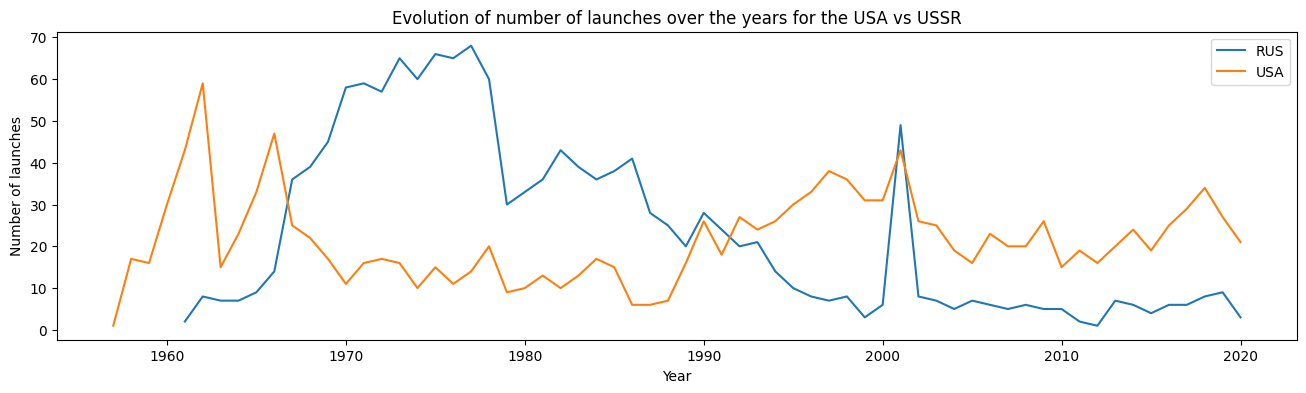

In [217]:
cold_war_country_code = ["RUS", "USA"]
for code in cold_war_country_code:
    df_data.loc[df_data["Country_Code"] == code].groupby(["Year"]).Count.sum().plot.line(
                figsize = (16, 4),
                title = 'Evolution of number of launches over the years for the USA vs USSR',
                ylabel = "Number of launches",
                xlabel = "Year",
                label = code
                )
plt.legend()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [254]:
cold_war_country_code = ["RUS", "USA"]
fig = px.sunburst(df_data.loc[df_data.Country_Code.isin(cold_war_country_code)], path = ["Country"], 
                  values = "Count", 
                  
                  )
fig.update_layout(
    title_text = 'Number of launches of the USSR vs USA', 
    width = 800, 
    height = 600,
    margin = dict(t=40, l =0, r = 0, b=40)
)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

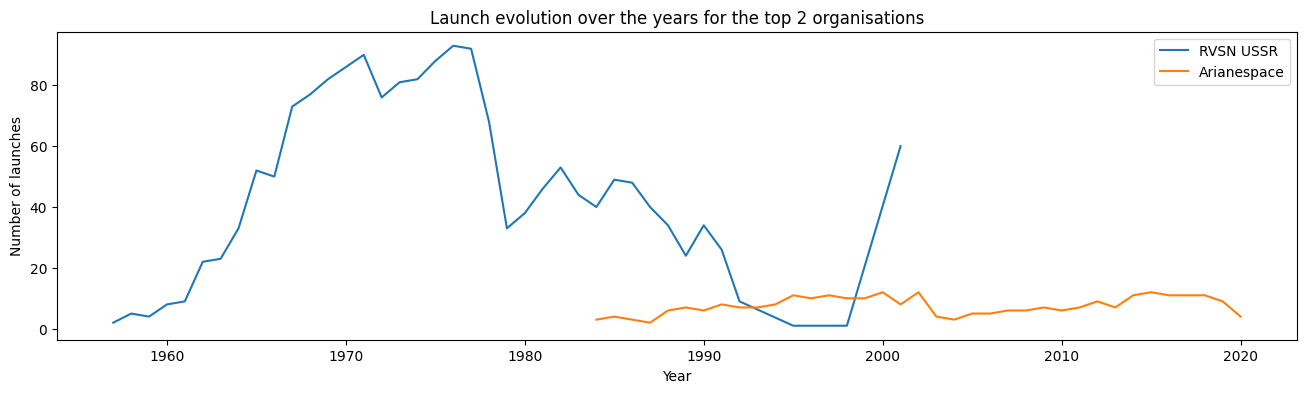

In [219]:
top_2_org = df_data["Organisation"].value_counts()[:2].index.to_list()
for org in top_2_org:
    df_data.loc[df_data["Organisation"] == org].groupby(["Year"]).Count.sum().plot.line(
                figsize = (16, 4),
                title = 'Launch evolution over the years for the top 2 organisations',
                ylabel = "Number of launches",
                xlabel = "Year",
                label = org
                )
plt.legend()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

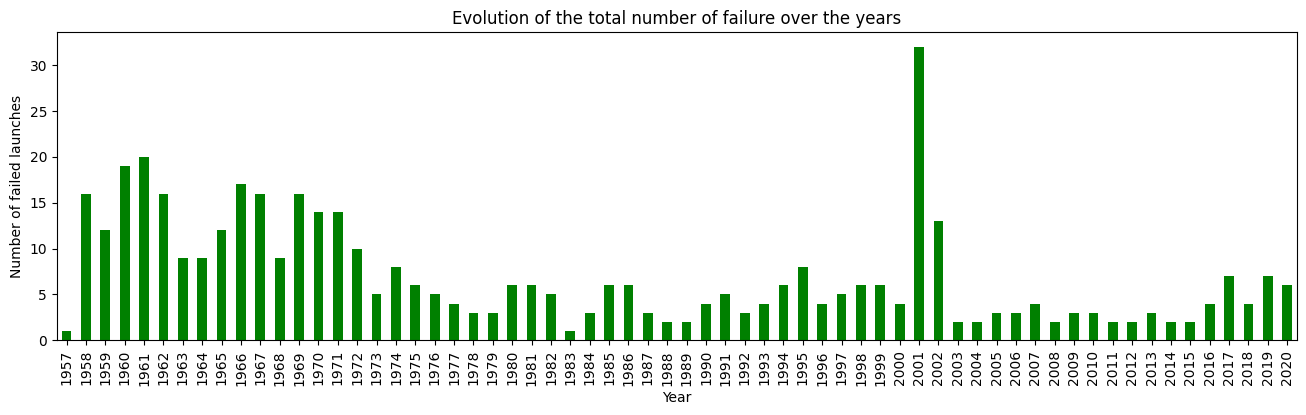

In [226]:
df_data.loc[df_data["Mission_Status"].str.lower().str.contains("failure")].groupby(["Year"]).Count.sum().plot.bar(
            figsize = (16, 4),
            title = 'Evolution of the total number of failure over the years',
            ylabel = "Number of failed launches",
            xlabel = "Year",
            color = "green",
            )
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [230]:
df_data["Mision_failed"] = df_data["Mission_Status"].str.lower().str.contains("failure")
df_data["Mision_succeded"]= ~ df_data["Mision_failed"]

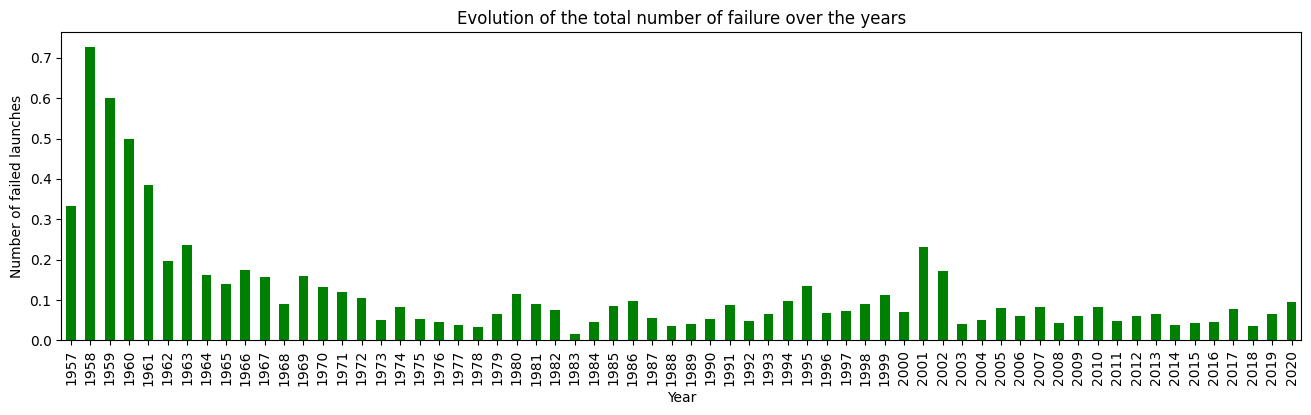

In [232]:
df_data.groupby(["Year"]).Mision_failed.mean().plot.bar(
            figsize = (16, 4),
            title = 'Percentage of failure over time',
            ylabel = "Number of failed launches",
            xlabel = "Year",
            color = "green",
            )
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [241]:
pd.options.display.max_rows = 100
df_data.groupby(["Country","Year"]).Count.sum().sort_values(ascending = False).reset_index().groupby("Year").first()


,Country,Count
Year,,
1957,Kazakhstan,2
1958,USA,17
1959,USA,16
1960,USA,30
1961,USA,43
1962,USA,59
1963,Kazakhstan,16
1964,Kazakhstan,26
1965,Kazakhstan,43


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [245]:
df_results = df_data.groupby(["Organisation","Year"]).Count.sum().sort_values(ascending = False).reset_index().groupby("Year").first()

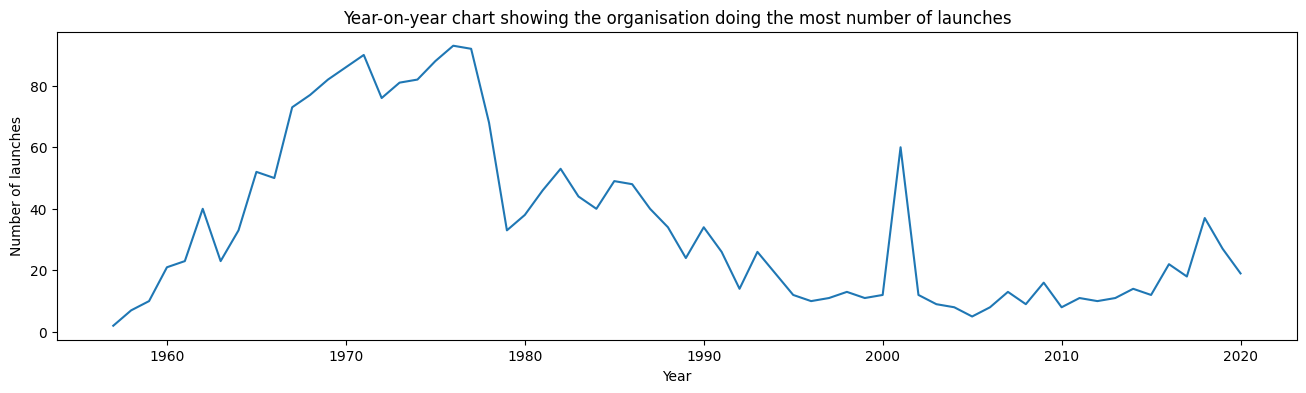

In [250]:
df_results["Count"].plot.line(
                figsize = (16, 4),
                title = 'Year-on-year chart showing the organisation doing the most number of launches',
                ylabel = "Number of launches",
                xlabel = "Year",
                )
plt.show()